In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv
import pickle
import seaborn as sns
from sklearn import decomposition
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
sns.set(color_codes=True)
%matplotlib inline 
# Import necessary modules
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:

data_frame = pd.read_csv("/content/drive/MyDrive/hemolysis/FVs.csv")
#data_frame = pd.read_csv("/content/hrdata_modified (2).csv")

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
data_frame.shape

(700, 154)

In [ ]:
data_frame.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,positive
0,145,354,1062,3564,381,929,2813,1203,2933,4209,145,-50976.00000,17921250.00000,-6300508968.00000,-54864.00000,19287911.00000,-6780905773.00000,20759226.00000,-7298083975.00000,-7854871242.00000,82274.26712,56069.17320,387437775.50000,21478788673.00000,56069.17320,34872825.78000,-3912798424.00000,387437775.50000,-3912798424.00000,21478788673.00000,2,0,0,0,0,3,0,1,2,4,...,13.00000,0.00000,0.00000,0.00000,370.00000,2833.00000,20887.00000,115543.00000,4293.00000,33153.00000,256033.00000,61471.00000,481745.00000,952299.00000,370.00000,-1045377.00000,2953548039.00000,-8340000000000.00000,-1584117.00000,4475674545.00000,-12600000000000.00000,6782245903.00000,-19200000000000.00000,-29000000000000.00000,446999999999999976931328.00000,-62999999999999997332422656.00000,18700000000000000174810000785408.00000,-198000000000000001906032286109794304.00000,-62999999999999997332422656.00000,846000000000000060169539026944.00000,-15900000000000001844011708520071168.00000,18700000000000000174810000785408.00000,-15900000000000001844011708520071168.00000,-198000000000000001906032286109794304.00000,13.00000,0.00000,0.00000,0.00000,0.00000,1
1,5501,65589,1024017,18007995,63644,768288,12089232,963032,11675488,16384274,5501,-360739500.00000,23700000000000.00000,-1550000000000000000.00000,-350042000.00000,23000000000000.00000,-1510000000000000000.00000,22300000000000.00000,-1460000000000000000.00000,-1420000000000000000.00000,3360000000000000132607115264.00000,427000000000000029038408105984.00000,205000000000000028618714261279997952.00000,-2700000000000000033665194890705823072256.00000,427000000000000029038408105984.00000,10900000000000001539674801281433600.00000,-200999999999999999819684909386701996032.00000,205000000000000028618714261279997952.00000,-200999999999999999819684909386701996032.00000,-2700000000000000033665194890705823072256.00000,31,4,29,29,18,24,6,40,41,31,...,9.00000,12.00000,8.00000,20.00000,6.00000,10.00000,16.00000,20.00000,3.00000,13.00000,15.00000,9.00000,8.00000,10.00000,16.00000,20.00000,12.00000,6.00000,4.00000,14.00000,18.00000,4.00000,12.00000,5.00000,18.00000,13.00000,1.00000,4.00000,6.00000,5.00000,4.00000,12.00000,13.00000,3.00000,9.00000,5.00000,8.00000,18.00000,18.00000,1
2,3197,29545,363689,5055211,27293,248347,3038193,301925,2711255,3760715,3197,-94425820.00000,2790000000000.00000,-82400000000000000.00000,-87228428.00000,2580000000000.00000,-76100000000000000.00000,2380000000000.00000,-70300000000000000.00000,-64900000000000000.00000,484000000000000000000.00000,92500000000000003145728.00000,7470000000000000069021466624.00000,-38900000000000000520184427184128.00000,92500000000000003145728.00000,405000000000000001258291200.00000,-2479999999999999914205880778752.00000,7470000000000000069021466624.00000,-2479999999999999914205880778752.00000,-38900000000000000520184427184128.00000,14,2,16,24,7,21,5,23,20,16,...,8.00000,16.00000,17.00000,6.00000,3.00000,10.00000,5.00000,4.00000,8.00000,1.00000,17.00000,18.00000,3.00000,18.00000,16.00000,20.00000,16.00000,20.00000,16.00000,7.00000,4.00000,4.00000,16.00000,14.00000,18.00000,16.00000,11.00000,17.00000,4.00000,17.00000,4.00000,18.00000,20.00000,4.00000,16.00000,9.00000,4.00000,8.00000,4.00000,1
3,351,1244,5410,26000,1166,3978,16918,4808,15806,22340,351,-435400.00000,540095474.00000,-670000000000.00000,-408100.00000,506229874.00000,-628000000000.00000,474489852.00000,-589000000000.00000,-552000000000.00000,5974814.01900,57132118.09000,266000000000.00000,-5540000000000.00000,57132118.09000,19360227252.00000,-6060000000000.00000,266000000000.00000,-6060000000000.00000,-5540000000000.00000,2,0,2,0,4,3,0,2,8,2,...,-27599999999999997806123472478273536.00000,-557999999999999968478057386163044352.00000,44.00000,

In [ ]:
data_frame.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,positive
695,8377,125353,2454845,54128131,119631,1781386,34792752,2229135,32958674,46756857,8377,-1049956728.00000,131600000000000.00000,-16500000000000000000.00000,-1002029256.00000,125592000000000.00000,-15700000000000000000.00000,119859000000000.00000,-15000000000000000000.00000,-14300000000000000000.00000,1750000000000000184916579846788743168.00000,514000000000000030363496860446464409600.00000,343000000000000016788481992776092266704928768.0...,-8270000000000002334055335457722517330496399081...,514000000000000030363496860446464409600.00000,17500000000000000553386214500319742203527168.00000,-5559999999999999951716189038039603186924886425...,343000000000000016788481992776092266704928768.0...,-5559999999999999951716189038039603186924886425...,-8270000000000002334055335457722517330496399081...,60,9,32,33,52,55,23,48,41,74,...,14.00000,16.00000,10.00000,10.00000,16.00000,5.00000,17.00000,8.00000,10.00000,5.00000,10.00000,1.00000,19.00000,10.00000,1.00000,6.00000,5.00000,16.00000,16.00000,15.00000,10.00000,5.00000,1.00000,18.00000,8.00000,15.00000,5.00000,4.00000,16.00000,8.00000,8.00000,7.00000,4.00000,5.00000,3.00000,13.00000,19.00000,5.00000,12.00000,0
696,13227,242660,5862764,159688934,238429,4383766,105633550,5680775,104508554,151648165,13227,-3209421160.00000,778739000000000.00000,-189000000000000000000.00000,-3153461954.00000,765161000000000.00000,-186000000000000000000.00000,751820000000000.00000,-182000000000000000000.00000,-179000000000000000000.00000,11600000000000000833130332981310616096910973337...,31400000000000002188055855761459413893399147708...,71700000000000023206101816822069244549761537724...,-3320000000000000231594643143954509334639372882...,31400000000000002188055855761459413893399147708...,37300000000000003362641534088659897820376928847...,-2300000000000000079836968930339727039530704324...,71700000000000023206101816822069244549761537724...,-2300000000000000079836968930339727039530704324...,-3320000000000000231594643143954509334639372882...,114,21,41,67,24,113,55,41,58,75,...,7.00000,6.00000,13.00000,13.00000,13.00000,16.00000,1.00000,13.00000,13.00000,16.00000,1.00000,7.00000,7.00000,14.00000,17.00000,12.00000,14.00000,14.00000,7.00000,7.00000,14.00000,18.00000,1.00000,7.00000,16.00000,14.00000,13.00000,7.00000,1.00000,17.00000,7.00000,20.00000,14.00000,14.00000,17.00000,12.00000,14.00000,7.00000,13.00000,0
697,1817,13866,135590,1482246,11762,88321,859341,97676,725459,911564,1817,-25180656.00000,348963000000.00000,-4836060000000000.00000,-21359792.00000,296012000000.00000,-4102240000000000.00000,251096000000.00000,-3479780000000000.00000,-2951760000000000.00000,3744970000000000.00000,522000000000000000.00000,14600000000000000000000.00000,-28399999999999998020288512.00000,522000000000000000.00000,833000000000000000000.00000,-1620000000000000058720256.00000,14600000000000000000000.00000,-1620000000000000058720256.00000,-28399999999999998020288512.00000,13,0,8,10,3,27,1,5,6,7,...,4.00000,18.00000,1.00000,16.00000,4.00000,20.00000,10.00000,15.00000,9.00000,6.00000,16.00000,14.00000,18.00000,20.00000,8.00000,4.00000,6.00000,14.00000,10.00000,15.00000,17.00000,15.00000,9.00000,19.00000,17.00000,3.00000,14.00000,16.00000,6.00000,14.00000,3.00000,15.00000,20.00000,17.00000,17.00000,4.00000,18.00000,18.00000,18.00000,0
698,3639,36329,476389,7013903,34171,343182,4534560,421019,4242302,5838451,3639,-132164902.00000,4800100000000.00000,-174000000000000000.00000,-124314098.00000,4514970000000.00000,-164000000000000000.00000,4246770000000.00000,-154000000000000000.00000,-145000000000000000.00000,10499999999999998951424.00000,1400000000000000083886080.00000,231000000000000009941372895232.00000,-1649999999999999881376093513449472.00000,1400000000000000083886

In [ ]:

data_frame.replace([np.inf, -np.inf], np.nan)
data_frame.reset_index()
#print (data_frame.isnull().values.any())
ds = data_frame.isin([np.inf, -np.inf])
print(ds)


         0      1      2      3      4  ...    149    150    151    152  positive
0    False  False  False  False  False  ...  False  False  False  False     False
1    False  False  False  False  False  ...  False  False  False  False     False
2    False  False  False  False  False  ...  False  False  False  False     False
3    False  False  False  False  False  ...  False  False  False  False     False
4    False  False  False  False  False  ...  False  False  False  False     False
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...       ...
695  False  False  False  False  False  ...  False  False  False  False     False
696  False  False  False  False  False  ...  False  False  False  False     False
697  False  False  False  False  False  ...  False  False  False  False     False
698  False  False  False  False  False  ...  False  False  False  False     False
699  False  False  False  False  False  ...  False  False  False  False     False

[700 rows x 154

In [ ]:
def plot_corr(data_frame, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = data_frame.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


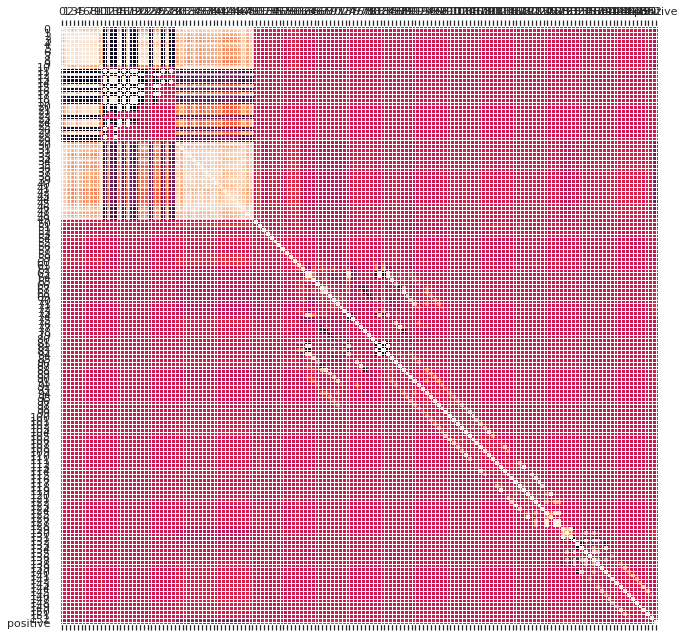

In [ ]:
plot_corr(data_frame)

In [ ]:
data_frame.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,positive
0,1.00000,0.92965,0.78986,0.67426,0.92748,0.78930,0.67401,0.78811,0.67429,0.67412,1.00000,-0.67193,0.52999,-0.49781,-0.67080,0.52974,-0.49766,0.52962,-0.49765,-0.49761,0.48416,0.48416,0.48416,-0.48416,0.48416,0.48416,-0.48416,0.48416,-0.48416,-0.48416,0.93014,0.79003,0.95592,0.91582,0.90941,0.91395,0.90921,0.92381,0.91279,0.95889,...,0.02798,0.04545,0.05697,-0.03444,0.02924,0.03896,0.02603,0.03512,0.05918,-0.02579,0.02914,0.03697,0.02912,0.02877,0.02877,-0.07700,-0.05851,-0.07074,0.04032,-0.03937,0.03914,-0.00149,0.03001,0.01139,0.07543,0.03046,0.05547,0.06597,0.05038,0.04993,0.08102,0.05774,0.06210,0.07776,0.05734,0.07475,0.04734,0.05930,0.04814,-0.43912
1,0.92965,1.00000,0.95736,0.88897,0.99979,0.95709,0.88882,0.95654,0.88909,0.88905,0.92965,-0.88750,0.77643,-0.74573,-0.88676,0.77620,-0.74558,0.77609,-0.74555,-0.74551,0.73131,0.73131,0.73131,-0.73131,0.73131,0.73131,-0.73131,0.73131,-0.73131,-0.73131,0.86143,0.84487,0.89806,0.80849,0.91144,0.83343,0.81687,0.86586,0.85525,0.88051,...,0.01584,0.02539,0.03234,-0.01941,0.01650,0.02220,0.01473,0.01980,0.03362,-0.01452,0.01642,0.02103,0.01648,0.01639,0.01639,-0.04494,-0.03416,-0.04129,0.02352,-0.02291,0.02279,-0.00079,0.01737,0.00707,0.04401,0.01798,0.03237,0.03866,0.02910,0.02945,0.04758,0.03402,0.03614,0.04572,0.03371,0.04417,0.02789,0.03503,0.02878,-0.27902
2,0.78986,0.95736,1.00000,0.98260,0.95858,0.99995,0.98254,0.99980,0.98266,0.98265,0.78986,-0.98201,0.91828,-0.89521,-0.98170,0.91811,-0.89507,0.91803,-0.89505,-0.89501,0.88315,0.88315,0.88315,-0.88315,0.88315,0.88315,-0.88315,0.88315,-0.88315,-0.88315,0.72885,0.82216,0.77106,0.64427,0.83789,0.69412,0.66348,0.74003,0.73221,0.73502,...,0.00819,0.01309,0.01675,-0.01005,0.00855,0.01149,0.00761,0.01024,0.01743,-0.00751,0.00851,0.01090,0.00852,0.00851,0.00851,-0.02354,-0.01788,-0.02162,0.01233,-0.01198,0.01192,-0.00039,0.00906,0.00378,0.02306,0.00948,0.01697,0.02036,0.01523,0.01555,0.02503,0.01796,0.01897,0.02409,0.01775,0.02332,0.01471,0.01852,0.01523,-0.16184
3,0.67426,0.88897,0.98260,1.00000,0.89089,0.98264,0.99998,0.98264,0.99995,0.99989,0.67426,-0.99996,0.97439,-0.95922,-0.99994,0.97428,-0.95912,0.97423,-0.95910,-0.95907,0.95029,0.95029,0.95029,-0.95029,0.95029,0.95029,-0.95029,0.95029,-0.95029,-0.95029,0.62035,0.77910,0.66453,0.51749,0.76332,0.58354,0.54073,0.63405,0.62994,0.61628,...,0.00453,0.00724,0.00928,-0.00557,0.00473,0.00637,0.00422,0.00567,0.00966,-0.00416,0.00472,0.00604,0.00472,0.00472,0.00472,-0.01308,-0.00994,-0.01202,0.00686,-0.00665,0.00662,-0.00021,0.00503,0.00211,0.01282,0.00528,0.00944,0.01135,0.00847,0.00867,0.01394,0.01002,0.01057,0.01343,0.00989,0.01301,0.00821,0.01033,0.00850,-0.09880
4,0.92748,0.99979,0.95858,0.89089,1.00000,0.95851,0.89084,0.95815,0.89118,0.89124,0.92748,-0.88944,0.77878,-0.74812,-0.88882,0.77857,-0.74797,0.77848,-0.74795,-0.74792,0.73374,0.73374,0.73374,-0.73374,0.73374,0.73374,-0.73374,0.73374,-0.73374,-0.73374,0.85948,0.84474,0.89640,0.80706,0.90988,0.83099,0.81536,0.86342,0.85393,0.87831,...,0.01563,0.02507,0.03192,-0.01918,0.01631,0.02191,0.01449,0.01957,0.03316,-0.01435,0.01623,0.02070,0.01621,0.01614,0.01614,-0.04435,-0.03369,-0.04075,0.02324,-0.02253,0.02241,-0.00074,0.01706,0.00698,0.04341,0.01785,0.03193,0.03835,0.02881,0.02925,0.04707,0.03374,0.03582,0.04527,0.03336,0.04374,0.02769,0.03471,0.02846,-0.27671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.07475,0.04417,0.02332,0.01301,0.04374,0.02323,0.01297,0.02297,0.01

Check class distribution
Rare events are hard to predict

In [ ]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['positive'] == 1])
print(num_true)

num_false = len(data_frame.loc[data_frame['positive'] == 0])

print(num_false)

print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

329
371
Number of True cases:  329 (47.00%)
Number of False cases: 371 (53.00%)


**Spliting the data**
70% for training, 30% for testing



In [ ]:
dfnew = data_frame.drop(columns=['F13','F16','F18','F19','F20','F114','F115','F116','F117','F118','F119','F120','F121','F115','F122','F123','F124','F125','F126','F127','F128','F129','F130','F131'])

In [ ]:
data_frame.replace([np.inf, -np.inf], np.nan, inplace=True)

TypeError: ignored

In [ ]:
data_frame.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,positive
count,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,...,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000,700.00000
mean,4135.78286,61143.35571,1412320.22714,44438659.60714,59773.31000,1046330.23857,29210399.97571,1353207.30714,28527932.16714,41884559.64714,4135.78286,-872645644.15143,919980592358057.37500,-2022298603749123817472.00000,-860951772.63714,914540809652135.37500,-2020843703786381770752.00000,907895041900305.00000,-2005360810818490335232.00000,-1989793179203804332032.00000,13014285714285718627706325136021602213060551276...,98571428571428611476659774948008623149136930009...,49142857142857171046111244809627052854849924846...,-1928571428571429607462510306261010181578906054...,98571428571428611476659774948008623149136930009...,23571428571428580961593336220692661239369701956...,-1247142857142857774043806495687535445575327844...,49142857142857171046111244809627052854849924846...,-1247142857142857774043806495687535445575327844...,-1928571428571429607462510306261010181578906054...,29.24286,7.29286,21.72857,27.37857,15.70286,26.60571,9.68000,20.16714,25.46857,38.83000,...,-1895552920096671292129906561908736.00000,-4351937422107528493351728102506496.00000,-8197163136142859249981473337376768.00000,1413544836505057600279788595970048.00000,-2270093319442856585883869788504064.00000,-7393308309672101481152584142028800.00000,-854528991842856982371341780910080.00000,-2696469854471428719372359251787776.00000,-10081219128571429307999782965346304.00000,1048285722442857395094101285666816.00000,-1714110285714285622560007701659648.00000,-118428571428571565994114394619904.00000,-928165714285714266647485692772352.00000,-87000000000000253087116563578880.00000,-2671428571428571703172379457880064.00000,138528142057878348365824.00000,60757142645434783620923392.00000,4037571477284693326219083513856.00000,-19802857129842804868910756768251904.00000,1722918102941245088817402085376.00000,-16028412772976532580325988763697152.00000,56065390672192765054629800050688.00000,-4152439366932556076273147091877888.00000,-681093580197513588674213154127872.00000,-55000548537688725283341343119114240.00000,-19550941846838814066070601462710272.00000,-27825548510952031019583046091276288.00000,-46376844725073817921388109000343552.00000,-21141506444529115811053711663300608.00000,-26561917853524039155284366816444416.00000,-79988271764393550200150116832116736.00000,-52684286682306605094331381197045760.00000,-25507487824997224374286467765108736.00000,-72734747861188335091233306634616832.00000,-39758537145415088622651236713234432.00000,-69650607914514232338384169121873920.00000,-40776650951580149720483697522638848.00000,-47400538934373808073332852896301056.00000,-39075212846546184472333676594593792.00000,0.47000
std,4870.48794,137089.46942,6242162.58320,356142659.89236,136072.79348,4649312.50658,234855012.97582,6088973.22243,230050389.93642,339743982.55337,4870.48794,7131935831.99217,18529158286399268.00000,49918965631463263830016.00000,7096453482.77254,18451904325730284.00000,49918034002366928257024.00000,1833726236

In [ ]:
#from sklearn.cross_validation import train_test_split

#feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['Positive','Nagetive']

# Separating out the target
#y = data_frame.loc[:,['Positive']].values

#df2 = data_frame.drop(['Positive','Nagetive'], axis=1)
#df2.reset_index(inplace=True)

pd.set_option('use_inf_as_na', True)

data_frame.replace([np.inf, -np.inf], np.nan, inplace = True)
data_frame.dropna(axis = 0, how ='all',inplace = True)

df2 = data_frame.drop(columns=['positive'])
df2.reset_index()

x = df2.values

y = data_frame['positive'].values


In [ ]:
# Separating out the features
#x = df2.values
print(y)
print(x)

# Standardizing the features
#x = StandardScaler().fit_transform(x)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
#X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [ ]:
# train models
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

X_train = X_train[: , :5];

# XGBClassifier
model1 = XGBClassifier(random_state=42)
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
#SVC
model3 = SVC(kernel='linear', C=1, random_state=42,probability=True)
#RandomForestClassifier
model4 = RandomForestClassifier(random_state=42, n_estimators = 10, max_depth = 2)
#AdaBoostClassifier
model5 = AdaBoostClassifier(random_state=42)
#DecisionTreeClassifier
model6 = DecisionTreeClassifier(random_state=42)
#MLPClassifier
model7 =MLPClassifier (hidden_layer_sizes=(13,13,13),max_iter=500, random_state=42)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# X_std = StandardScaler().fit_transform(x)
# pca = PCA(n_components=2)
# pca.fit(X_std.astype("float"))
# train_features = pca.transform(X_std)

model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)

training_start = time.perf_counter()
xgb_predict_test = model1.predict(X_test)
#get accuracy
xgb_accuracy_testdata = metrics.accuracy_score(y_test, xgb_predict_test)
#print accuracy
print ("Accuracy of xgboost: {0:.4f}".format(xgb_accuracy_testdata))
training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing 1XGB in independent test: %4.3f" % (model_train_time))


training_start = time.perf_counter()
knn_predict_test = model2.predict(X_test)
#get accuracy
knn_accuracy_testdata = metrics.accuracy_score(y_test, knn_predict_test)
#print accuracy
print ("Accuracy of KNN: {0:.4f}".format(knn_accuracy_testdata))
training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing 2_KNN in independent test: %4.3f" % (model_train_time))

training_start = time.perf_counter()
svm_predict_test = model3.predict(X_test)
#get accuracy
svm_accuracy_testdata = metrics.accuracy_score(y_test, svm_predict_test)
#print accuracy
print ("Accuracy of svm: {0:.4f}".format(svm_accuracy_testdata))
training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing SVM_3 in independent test: %4.3f" % (model_train_time))

training_start = time.perf_counter()
rf_predict_test = model4.predict(X_train)
#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)
#print accuracy
print ("Accuracy of rendom forest: {0:.4f}".format(rf_accuracy_testdata))
training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing RF_4 in independent test: %4.3f" % (model_train_time))


training_start = time.perf_counter()
adabost_predict_test = model5.predict(X_test)
#get accuracy
adabost_accuracy_testdata = metrics.accuracy_score(y_test, adabost_predict_test)
#print accuracy
print ("Accuracy of Adabooost: {0:.4f}".format(adabost_accuracy_testdata))
training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing Adaboost_5 in independent test: %4.3f" % (model_train_time))


training_start = time.perf_counter()
dt_predict_test = model6.predict(X_test)
#get accuracy
dt_accuracy_testdata = metrics.accuracy_score(y_test, dt_predict_test)
#print accuracy
print ("Accuracy of DT: {0:.4f}".format(dt_accuracy_testdata))
training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing DT_6 in independent test: %4.3f" % (model_train_time))



training_start = time.perf_counter()
nn_predict_test = model7.predict(X_test)
#get accuracy
nn_accuracy_testdata = metrics.accuracy_score(y_test, nn_predict_test)
#print accuracy
print ("Accuracy of NN: {0:.4f}".format(nn_accuracy_testdata))
training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing NN_7 in independent test: %4.3f" % (model_train_time))


# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob5 = model5.predict_proba(X_test)
pred_prob6 = model6.predict_proba(X_test)
pred_prob7 = model7.predict_proba(X_test)

In [ ]:
#for model XGBOOST
cm = confusion_matrix(y_test, xgb_predict_test, labels=[1, 0]).ravel()
print(cm)
tp, fp, fn, tn = confusion_matrix(y_test, xgb_predict_test, labels=[1, 0]).ravel()
np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, xgb_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(X_test)
pickle.dump(model1, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in XGBOOST-Results_independent test.csv')
with open('./Results are Saved in XGBOOST-Results_independent test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['independent test for xgboost'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

[ 67   9   2 166]
[67, 9, 166, 2, 95.49, 94.86, 97.1, 0.89428]


Results are Saved in XGBOOST-Results_independent test.csv


In [ ]:
#for model KNN
cm = confusion_matrix(y_test, knn_predict_test, labels=[1, 0]).ravel()
print(cm)
tp, fp, fn, tn = confusion_matrix(y_test, knn_predict_test, labels=[1, 0]).ravel()
np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, knn_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(X_test)
pickle.dump(model2, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in knn_independend.csv')
with open('./Results are Saved in knn_independend.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['independent test for KNN'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

[ 59  17   3 165]
[59, 17, 165, 3, 91.8, 90.66, 95.16, 0.80679]


Results are Saved in knn_independend.csv


In [ ]:
#for model NN
cm = confusion_matrix(y_test, svm_predict_test, labels=[1, 0]).ravel()
print(cm)
tp, fp, fn, tn = confusion_matrix(y_test, svm_predict_test, labels=[1, 0]).ravel()
np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, svm_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(X_test)
pickle.dump(model3, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in SVM_INDEPENDENT.csv')
with open('./SVM_INDEPENDENT.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['independent test for SVM'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

[ 68   8   9 159]
[68, 8, 159, 9, 93.03, 95.21, 88.31, 0.83818]


Results are Saved in SVM_INDEPENDENT.csv


In [ ]:
#for model RF
cm = confusion_matrix(y_test, rf_predict_test, labels=[1, 0]).ravel()
print(cm)
tp, fp, fn, tn = confusion_matrix(y_test, rf_predict_test, labels=[1, 0]).ravel()
np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, rf_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(X_test)
pickle.dump(model4, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in RF_independent.csv')
with open('./RF_independent.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['independent test for RF'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

[ 63  13   2 166]
[63, 13, 166, 2, 93.85, 92.74, 96.92, 0.8559]


Results are Saved in RF_independent.csv


In [ ]:
#for model adabost
cm = confusion_matrix(y_test, adabost_predict_test, labels=[1, 0]).ravel()
print(cm)
tp, fp, fn, tn = confusion_matrix(y_test, adabost_predict_test, labels=[1, 0]).ravel()
np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, adabost_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(X_test)
pickle.dump(model5, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved adabost_independent.csv')
with open('./adaboost_independent.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['independent test for adaboost'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

[ 67   9   4 164]
[67, 9, 164, 4, 94.67, 94.8, 94.37, 0.87454]


Results are Saved adabost_independent.csv


In [ ]:
#for model DT
cm = confusion_matrix(y_test, dt_predict_test, labels=[1, 0]).ravel()
print(cm)
tp, fp, fn, tn = confusion_matrix(y_test, dt_predict_test, labels=[1, 0]).ravel()
np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, dt_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(X_test)
pickle.dump(model6, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved DT_independent.csv')
with open('./DT_independent.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['independent test for DT'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

[ 63  13   8 160]
[63, 13, 160, 8, 91.39, 92.49, 88.73, 0.7966]


Results are Saved DT_independent.csv


In [ ]:
#for model NN
cm = confusion_matrix(y_test, nn_predict_test, labels=[1, 0]).ravel()
print(cm)
tp, fp, fn, tn = confusion_matrix(y_test, nn_predict_test, labels=[1, 0]).ravel()
np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, nn_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(X_test)
pickle.dump(model7, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in NN_independent.csv')
with open('./NN_independent test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['independent test for NN'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

[ 65  11   6 162]
[65, 11, 162, 6, 93.03, 93.64, 91.55, 0.83557]


Results are Saved in NN_independent.csv


In [ ]:
print ("Classification Report of XGBOOST_1")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, xgb_predict_test, labels=[1, 0])))

Classification Report of XGBOOST_1
              precision    recall  f1-score   support

           1       0.97      0.88      0.92        76
           0       0.95      0.99      0.97       168

    accuracy                           0.95       244
   macro avg       0.96      0.93      0.95       244
weighted avg       0.96      0.95      0.95       244



In [ ]:
print ("Classification Report KNN_2")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, knn_predict_test, labels=[1, 0])))

Classification Report KNN_2
              precision    recall  f1-score   support

           1       0.95      0.78      0.86        76
           0       0.91      0.98      0.94       168

    accuracy                           0.92       244
   macro avg       0.93      0.88      0.90       244
weighted avg       0.92      0.92      0.92       244



In [ ]:
print ("Classification Report SVM_3")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, svm_predict_test, labels=[1, 0])))

Classification Report SVM_3
              precision    recall  f1-score   support

           1       0.88      0.89      0.89        76
           0       0.95      0.95      0.95       168

    accuracy                           0.93       244
   macro avg       0.92      0.92      0.92       244
weighted avg       0.93      0.93      0.93       244



In [ ]:
print ("Classification Report RF_4")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Classification Report RF_4
              precision    recall  f1-score   support

           1       0.97      0.83      0.89        76
           0       0.93      0.99      0.96       168

    accuracy                           0.94       244
   macro avg       0.95      0.91      0.93       244
weighted avg       0.94      0.94      0.94       244



In [ ]:
print ("Classification Report adabost_5")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, adabost_predict_test, labels=[1, 0])))

Classification Report adabost_5
              precision    recall  f1-score   support

           1       0.94      0.88      0.91        76
           0       0.95      0.98      0.96       168

    accuracy                           0.95       244
   macro avg       0.95      0.93      0.94       244
weighted avg       0.95      0.95      0.95       244



In [ ]:
print ("Classification Report DT_6")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=[1, 0])))

Classification Report DT_6
              precision    recall  f1-score   support

           1       0.89      0.83      0.86        76
           0       0.92      0.95      0.94       168

    accuracy                           0.91       244
   macro avg       0.91      0.89      0.90       244
weighted avg       0.91      0.91      0.91       244



In [ ]:
print ("Classification Report NN")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, nn_predict_test, labels=[1, 0])))

Classification Report NN
              precision    recall  f1-score   support

           1       0.92      0.86      0.88        76
           0       0.94      0.96      0.95       168

    accuracy                           0.93       244
   macro avg       0.93      0.91      0.92       244
weighted avg       0.93      0.93      0.93       244



In [ ]:
# model1 XGBClassifier
# model2 knn

#model3 SVC

# model4 RandomForestClassifier

# model5 AdaBoostClassifier

# model6 DecisionTreeClassifier

# model7 MLPClassifier



In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
# roc curve for tpr = fpr 
i=6,
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])

print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5,auc_score6,auc_score7)

0.9890742481203008 0.9736450501253134 0.9667136591478697 0.979049185463659 0.9838267543859648 0.8906641604010025 0.9677318295739349


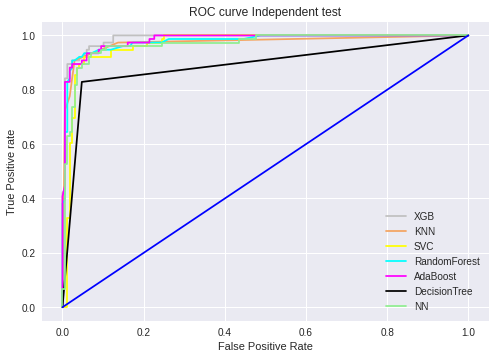

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='solid',color='silver', label='XGB')
plt.plot(fpr2, tpr2, linestyle='solid',color='sandybrown', label='KNN')
plt.plot(fpr3, tpr3, linestyle='solid',color='yellow', label='SVC')
plt.plot(fpr4, tpr4, linestyle='solid',color='cyan', label='RandomForest')
plt.plot(fpr5, tpr5, linestyle='solid',color='magenta', label='AdaBoost')
plt.plot(fpr6, tpr6, linestyle='solid',color='black', label='DecisionTree')
plt.plot(fpr7, tpr7, linestyle='solid',color='lightgreen', label='NN')
plt.plot(p_fpr, p_tpr, linestyle='solid', color='blue')
# title
plt.title('ROC curve Independent test')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC curve Independent test',dpi=300)
plt.show();